# Point and Interval Estimation

Statistical inference consists in making judgments about a population based on sampling properties. 

An important aspect of statistical inference is using estimates to approximate the value of an unknown population parameter. There are two types of estimation: point and interval.

- `Point Estimation` is a type of estimation that uses a single value, a sample statistic, to infer information about the population. 

- `Interval Estimation` is the range of numbers in which a population parameter lies considering the margin of error.

In [7]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 


array([[2.12199579e-314, 0.00000000e+000],
       [9.07104526e-321, 3.79442416e-321]])

## Point Estimation

A single value estimates a population parameter.

For example, to know the average age of registered voters in the U.S., we could survey voters and then use the respondents' average age to estimate the population's average age.

The sample mean does not represent the exact value for the population mean. It is a point estimator.

In [2]:
# Generating 1000 age values of fictitious voters using a normal distribution (`np.random.normal`)
a = np.random.normal(45, 8, size=1000)

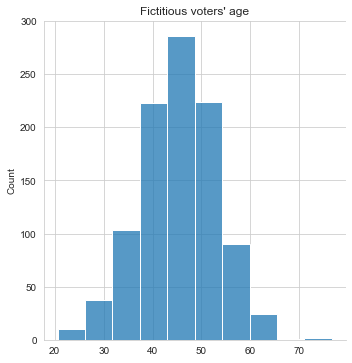

In [3]:
ax = sns.displot(x=a, bins=10)
ax.set(title="Fictitious voters' age");

**Point Estimation**: Sample Mean

In [4]:
print('The estimated mean value of the voters age is: %.0f' % a.mean())

The estimated mean value of the voters age is: 45


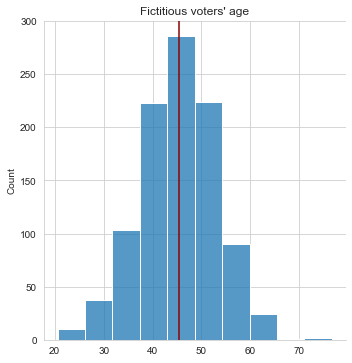

In [5]:
ax = sns.displot(x=a, bins=10)
plt.axvline(x=a.mean(), color='darkred')
ax.set(title="Fictitious voters' age");

There is a slight difference between population variance and sample variance. The denominator of the first is n (number of observations), and n-1 is for the second. 

Here, you will see how to calculate each of them:

In [6]:
print('Population variance value: %.3f'% a.var())
print('Sample variance value:     %.3f'% a.var(ddof=1))

Population variance value: 61.592
Sample variance value:     61.653


In [7]:
print('Population standard deviation: %.3f'% a.std())
print('Sample standard deviation:     %.3f'% a.std(ddof=1))

Population standard deviation: 7.848
Sample standard deviation:     7.852


Let's calculate the proportion of numbers less than 55:

In [8]:
a50 = [1 if x<50 else 0 for x in a]

In [9]:
p50 = np.sum(a50)/len(a50)
print('The estimated proportion of the voters age less than 55: %.3f'% p50)

The estimated proportion of the voters age less than 55: 0.726


## Interval Estimation

Confidence Intervals for the Mean in Large Populations with Normal Distributions:
- Find a point estimate and the margin of error
- Construct and interpret confidence intervals for the population mean

Some useful definitions:
- `level of confidence`: the probability that the interval estimate contains the population parameter. The typical values are: `90%`, `95%`, and `99%`. 

- `sampling error`: is the difference between the point estimate and the actual population parameter value.
- For `μ`: 
    - the sampling error is the difference between the estimated mean and the poblational value `μ`
    - `μ` is generally unknown
    - the estimated mean varies from sample to sample

- `margin of error`: is the greatest possible distance between the point estimate and the parameter's value. It is estimated for a given level of confidence, `c`.

If the level of confidence is `90%`, this means that we are `90%` confident that the interval contains the population mean `μ`.

### Confidence Interval for mean using scipy

In [10]:
import scipy.stats as st

In [11]:
print('Sample mean    = %.2f' %a.mean())
print('Sampling error = %.2f' %(st.sem(a)))

Sample mean    = 45.31
Sampling error = 0.25


Remember, this function to calculate confidence intervals for the mean is valid only if data follows some assumption (data comes from a normal distribution).

In [12]:
print('90% Confidence Interval =', np.round(st.t.interval(0.90, len(a)-1, loc=np.mean(a), scale=st.sem(a)),2))
print('95% Confidence Interval =', np.round(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),2))
print('99% Confidence Interval =', np.round(st.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=st.sem(a)),2))

90% Confidence Interval = [44.9  45.72]
95% Confidence Interval = [44.82 45.8 ]
99% Confidence Interval = [44.67 45.95]


### Confidence Interval for mean using statsmodels

`statsmodels` is a Python library that provides classes and functions for the estimation of statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [13]:
import statsmodels.stats.api as sm

- 90% Confidence (1 - 0.9  = 0.1)
- 95% Confidence (1 - 0.95 = 0.05)
- 99% Confidence (1 - 0.99 = 0.01)

In [14]:
print('90% Confidence Interval =', np.round(sm.DescrStatsW(a).tconfint_mean(0.1),2))
print('95% Confidence Interval =', np.round(sm.DescrStatsW(a).tconfint_mean(0.05),2))
print('99% Confidence Interval =', np.round(sm.DescrStatsW(a).tconfint_mean(0.01),2))

90% Confidence Interval = [44.9  45.72]
95% Confidence Interval = [44.82 45.8 ]
99% Confidence Interval = [44.67 45.95]


These intervals are the same as those calculated using `scipy`

### Confidence Interval for difference in mean

The confidence interval of the mean difference is the basis of the hypothesis test t-test. 

One way to compare sample means is to construct the confidence interval of the mean difference. If the two samples came from the same population, they should have the "similar enough" means.

In [15]:
x1 = np.array([148, 128, 69, 34, 155, 123, 101, 150, 139,  98])
x2 = np.array([151, 146, 32, 70, 155, 142, 134, 157, 150, 130])

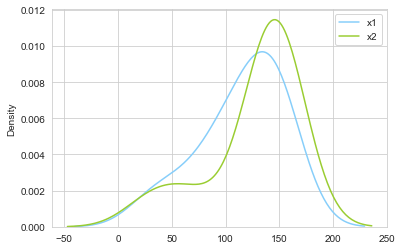

In [16]:
sns.kdeplot(x=x1, color='lightskyblue', label='x1')
sns.kdeplot(x=x2, color='yellowgreen', label='x2')
plt.legend();

In [17]:
d = x2 - x1

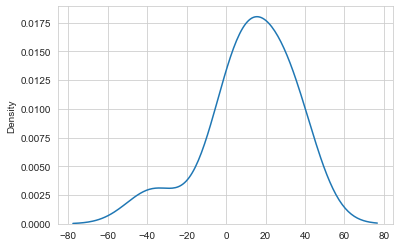

In [18]:
# Plotting the difference d
sns.kdeplot(x=d);

In [19]:
d_bar = np.mean(d)            # average of sample differences
s_d = np.std(d, ddof=1)       # sample standard deviation of sample differences

In [20]:
n = len(x1)                  # sample size
df = n - 1                   # degrees of freedom

In [21]:
t90 = st.t.ppf(1 - 0.1/2, df)    # t-critical value for 90% CI
t95 = st.t.ppf(1 - 0.05/2, df)   # t-critical value for 95% CI
t99 = st.t.ppf(1 - 0.01/2, df)   # t-critical value for 99% CI

In [22]:
# 90% CI
low90 = np.round(d_bar - t90 * s_d / np.sqrt(n),2)
upp90 = np.round(d_bar + t90 * s_d / np.sqrt(n),2)
# 95% CI
low95 = np.round(d_bar - t95 * s_d / np.sqrt(n),2)
upp95 = np.round(d_bar + t95 * s_d / np.sqrt(n),2)
# 99% CI
low99 = np.round(d_bar - t99 * s_d / np.sqrt(n),2)
upp99 = np.round(d_bar + t99 * s_d / np.sqrt(n),2)

In [23]:
print('90%% CI for the diff of means = (%.2f, %.2f)' %(low90, upp90))
print('95%% CI for the diff of means = (%.2f, %.2f)' %(low95, upp95))
print('99%% CI for the diff of means = (%.2f, %.2f)' %(low99, upp99))

90% CI for the diff of means = (-0.25, 24.65)
95% CI for the diff of means = (-3.17, 27.57)
99% CI for the diff of means = (-9.88, 34.28)


### Confidence interval for variance

The confidence interval of variance is used to estimate the population variance from sample data and quantify the related uncertainty.

In [24]:
arr = [8.01, 8.95, 9.65, 9.15, 8.06, 8.95, 8.03, 8.19, 8.03]

In [25]:
alpha = 0.05               # significance level = 5%
n = len(arr)               # sample sizes

In [26]:
s2 = np.var(arr, ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

In [27]:
# 90% CI
vupp90 = (n-1)*s2/st.chi2.ppf(0.1/2, df)
vlow90 = (n-1)*s2/st.chi2.ppf(1-0.1/2, df)
# 95% CI
vupp95 = (n-1)*s2/st.chi2.ppf(0.05/2, df)
vlow95 = (n-1)*s2/st.chi2.ppf(1-0.05/2, df)
# 99% CI
vupp99 = (n-1)*s2/st.chi2.ppf(0.01/2, df)
vlow99 = (n-1)*s2/st.chi2.ppf(1-0.01/2, df)

In [28]:
print('90%% CI for variance = (%.2f, %.2f)' %(vlow90, vupp90))
print('95%% CI for variance = (%.2f, %.2f)' %(vlow95, vupp95))
print('99%% CI for variance = (%.2f, %.2f)' %(vlow99, vupp99))

90% CI for variance = (0.20, 1.13)
95% CI for variance = (0.18, 1.42)
99% CI for variance = (0.14, 2.30)


### Computing several confidence intervals

**`Correct interpretation for a confidence interval`**: If many samples are collected, and a **`90%`** confidence interval is computed for each sample, approximately **`90%`** of these intervals will contain the population parameter **`μ`**.

Let's generate `population_age` with 10000-age values. This will be our population.

In [29]:
population_age = np.random.normal(45, 8, size=10000)

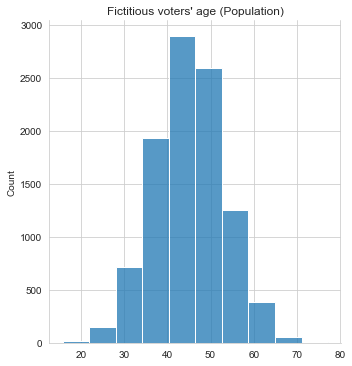

In [30]:
ax = sns.displot(x=population_age, bins=10)
ax.set(title="Fictitious voters' age (Population)");

In [31]:
sample_size = 1000

Let's extract 10 different samples of size `sample_size`, and calculate the 90% confidence interval for the mean.

In [32]:
intervals =[]
sample_means = []
for sample in range(10):
    sample = np.random.choice(population_age, sample_size)
    sample_means.append(sample.mean())
    intervals.append(st.t.interval(0.9, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)))  

Let's plot the results. 

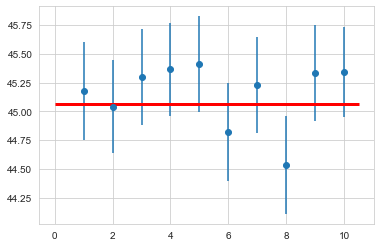

In [33]:
plt.errorbar(x=np.arange(1, 11, 1), y=sample_means, yerr=[(top-bot)/2 for top,bot in intervals], fmt='o')
plt.hlines(xmin=0, xmax=10.5, y=np.mean(population_age), linewidth=3.0, color="red");

The horizontal red line represents the population mean. That is the value you want to estimate, which means you do not know it.

90% confidence interval means that from 10 different intervals, 9 will contain the population mean.

All these formulas to calculate confidence intervals assumes the data follow normal distributions. That is not always true.

Reference:
- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer, chapter 23